# 視線の視線移動の可視化

## データの用意（ここから）

In [1]:
# 視線を表示する（メモ付き）
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import cv2
import sys
from matplotlib import rcParams
# plt.rcParams['font.family'] = "MS Gothic"
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':["MS Gothic"]})
plt.rcParams['pdf.fonttype'] = 42

# import matplotlib
# matplotlib.use('pgf')
# plt.rcParams['text.usetex'] = True 
# plt.rcParams['pgf.texsystem'] = 'lualatex'
# plt.rcParams['pgf.preamble'] = r'\usepackage{unicode-math}\setmainfont{IPAexGothic}\setmathfont{Fira Math}'
# plt.rcParams['pgf.rcfonts'] = False
#import matplotlib.pyplot

### 動画の選択

In [2]:
# data_dir = '../data/gaze1'
# video_dir = '../data/video'
# video_list = ['ty1.mp4', 'au2.mp4', 'ci3.mp4']
# gnum = 1


# data_dir = '../data/gaze2'
# video_dir = '../data/video'
# video_list = ['ty2.mp4', 'au3.mp4', 'ci4.mp4']
# gnum = 2


# data_dir = '../data/gaze3'
# video_dir = '../data/video'
# video_list = ['ty3.mp4', 'au4.mp4', 'ci1.mp4']
# gnum = 3


data_dir = '../data/gaze4'
video_dir = '../data/video'
video_list = ['ty4.mp4', 'au1.mp4', 'ci2.mp4']
gnum = 4


userid = -1 # -1 # 1-30  # userid = -1: all users
filter_user = 1  # None: no filter, 0: only uncorrect, 1: only correct
videoid = 1  # 1-3

ptsize = 5
ptcolor = (0, 0, 255)  # B, G, R


In [3]:
import glob
# Gaze, Video再生時刻データを取得
# eyefname = 'u01_s1_20200222-113912_eyetracker.csv'
# vdpfname = 'u01_s1_20200222-113912_videoplayer.csv'

# eyefpath = os.path.join(data_dir, eyefname)
# vdpfpath = os.path.join(data_dir, vdpfname)

# u01_s3_20200222-120644_eyetracker.csv
# u01_s3_20200222-120644_videoplayer.csv

if userid > 0:
    eyefpath = glob.glob(os.path.join(data_dir, f'u{userid:02d}_s{videoid:d}_*eyetracker.csv'))
    # print(eyefpath)
    # print(files)
    assert(len(eyefpath) == 1)
    # eyefpath = files[0]
    print("eyefpath", eyefpath)

    vdpfpath = glob.glob(os.path.join(data_dir, f'u{userid:02d}_s{videoid:d}_*videoplayer.csv'))
    # print(files)
    assert(len(vdpfpath) == 1)
    # vdpfpath = files[0]
    print("vdpfpath", vdpfpath)
else:
    eyefpath = glob.glob(os.path.join(data_dir, f'u*_s{videoid:d}_*eyetracker.csv'))
    vdpfpath = glob.glob(os.path.join(data_dir, f'u*_s{videoid:d}_*videoplayer.csv'))
assert(len(eyefpath) == len(vdpfpath))
print('nfiles:', len(eyefpath), len(vdpfpath))

nfiles: 6 6


In [4]:
#print(eyefpath)
# ビデオファイルの準備と情報取得

delay = 1
window_name = 'frame'
vidfname = video_list[videoid - 1]
print('Open video file: ', vidfname)

# 読み込み
cap = cv2.VideoCapture(os.path.join(video_dir, vidfname))
# サイズ
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# FPS（1秒あたりのフレーム数）
fps = int(cap.get(cv2.CAP_PROP_FPS))
# 総フレーム数（動画の秒数＝総フレーム数/FPS）
nframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'width: {width}, height: {height}, nframes: {nframes}, fps: {fps}')

Open video file:  ty4.mp4
width: 1280, height: 720, nframes: 13537, fps: 30


In [5]:
eyeheader = ['dt_sec', 'msec', 'eye_x', 'eye_y',
    'leye_x', 'leye_y', 'reye_x', 'reye_y', 'dev_clock', 'sys_clock']
vdpheader = ['dt_sec', 'msec', 'sys_clock', 'counter', 'sampletime_start', 'sampletime_end']

dfg = []
dfv = []
# print(len(eyefpath))
for i in range(len(eyefpath)):
    df = pd.read_csv(eyefpath[i], header=None, names=eyeheader)
    df['eye_x'] = df['eye_x'] * width
    df['eye_y'] = df['eye_y'] * height
    dfg.append(df)
    dfv.append(pd.read_csv(vdpfpath[i], header=None, names=vdpheader))

# # print(dfg)
print(dfg[0].head())
# print()
# # print(dfv)
print(dfv[0].head())

           dt_sec  msec       eye_x       eye_y    leye_x    leye_y    reye_x  \
0  20231107154216   168  603.729897  342.361397  0.468683  0.470007  0.474645   
1  20231107154216   168  602.042522  341.833184  0.466593  0.469105  0.474098   
2  20231107154216   168  603.379326  340.508237  0.468947  0.467775  0.473833   
3  20231107154216   168  604.128513  341.943852  0.469719  0.468562  0.474232   
4  20231107154216   168  605.281525  344.427449  0.471275  0.475259  0.474477   

     reye_y  dev_clock        sys_clock  
0  0.480997  367913591  117011582099282  
1  0.480431  367924694  117011582110383  
2  0.478082  367935797  117011582121481  
3  0.481282  367946900  117011582132578  
4  0.481484  367958003  117011582143675  
           dt_sec  msec        sys_clock  counter  sampletime_start  \
0  20231107154217   730  117011583771422        0                 0   
1  20231107154218   372  117011584414018        1            333333   
2  20231107154218   384  117011584426397        

In [6]:
vclock = dfv[0]['sys_clock'].values
T = len(vclock)
print('T', T)

T 13537


## データの用意（ここまで）

# 本編

## 重要語の列挙

In [7]:
# 重要語の位置[[重要語開始, 重要語終わり, 横幅min, 横幅max, 縦幅min, 縦幅max], ……]

# 台風視点確認
if videoid == 1:
    alist = [[563, 730, 105, 312, 465, 387, 1], [1778, 1995, 235, 551, 520, 627, 2], [2300, 2413, 645, 203, 780, 276, 3], [3793, 3903, 75, 422, 435, 492, 4], [4510, 4692, 75, 248, 538, 319, 5], [4839, 4935, 498, 323, 635, 396, 6], [5470, 5682, 345, 399, 568, 471, 7], [5683, 5895, 315, 475, 450, 549, 8], [8740, 8893, 165, 270, 510, 340, 9], [10508, 10665, 375, 207, 820, 278, 10],[10840, 10970, 75, 281, 390, 356, 11], [11830, 11955, 75, 281, 390, 356, 12], [12308, 12435, 135, 237, 330, 309, 13]]
# オーストラリア
elif videoid == 2:
    alist = [[668, 927, 295, 286, 442, 354, 1], [928, 1187, 348, 319, 508, 387, 2], [1628, 1725, 74, 114, 274, 187, 3], [2647, 2745, 377, 341, 658, 415, 4], [3339, 3465, 133, 271, 581, 342, 5], [4895, 4990, 785, 525, 925, 592, 6], [4991, 5085, 126, 553, 460, 621, 7], [6365, 6430, 765, 314, 960, 382, 8], [6431, 6495, 79, 342, 150, 412, 9], [11048, 11205, 495, 193, 841, 262, 10], [11497, 11773, 505, 290, 695, 361, 11], [12847, 12943, 225, 400, 395, 470, 12], [14378, 14564, 375, 219, 843, 292, 13]]
# 都市工学
elif videoid == 3:
    alist = [[245, 332, 230, 203, 620, 280, 1], [1175, 1333, 70, 280, 315, 200, 2], [1928, 2013, 255, 411, 360, 482, 3], [5467, 5683, 550, 204, 950, 276, 4], [6757, 6885, 400, 355, 620, 430, 5], [9638, 9795, 765, 225, 885, 299, 6], [11528, 11623, 600, 310, 880, 387, 7], [12758, 12916, 380, 248, 520, 319, 8], [14440, 14594, 765, 443, 930, 515, 9], [15008, 15133, 425, 290, 971, 359, 10]]

In [8]:
# 視点確認（見てない重要語を列挙）
# a_l[a][b][c]：a=ユーザー, b=重要語, c=最初か最後
a_l = [] 
for i in range(len(dfg)):
    dfgc = dfg[i].copy().reset_index()
    alis = []
#     print(len(dfgc))
    for l in alist:
        al = []
        dfgcc = dfgc[dfgc["sys_clock"]>=dfv[i]["sys_clock"][l[0]]]
        dfgcc = dfgcc[dfgcc["sys_clock"]<=dfv[i]["sys_clock"][l[1]]]
        al.append(dfgcc["index"][0:1])
        al.append(dfgcc["index"][len(dfgcc)-1:len(dfgcc)])
        alis.append(al)
        dfgcc = dfgcc[dfgcc["eye_x"]>=l[2]] # 行単位で見るならコメントアウト
        dfgcc = dfgcc[dfgcc["eye_y"]>=l[3]]
        dfgcc = dfgcc[dfgcc["eye_x"]<=l[4]] # 行単位で見るならコメントアウト
        dfgcc = dfgcc[dfgcc["eye_y"]<=l[5]]
        if len(dfgcc) == 0:
            print(i+1, "動画目", l[6], "番目の重要語")
    a_l.append(alis)

2 動画目 3 番目の重要語
3 動画目 12 番目の重要語
4 動画目 12 番目の重要語
5 動画目 12 番目の重要語
6 動画目 3 番目の重要語


## 視線の移動を可視化（共通）

In [10]:
# スライドの変わり目をdfgのフレーム数で取得
# スライドの開始点
slide_list = [0, 129, 2015, 4318, 6210, 8081, 10367, 12145, 13425]
slide_l = []
for i in range(len(dfg)):
    dfgc = dfg[i].copy().reset_index()
    slis = []
#     print("dfv", len(dfv[i]))
#     print(len(dfgc))
    for n in range(len(slide_list)):
#         print(n)
        sl = []
        if n != len(slide_list)-1:
            dfgcc = dfgc[dfgc["sys_clock"]>=dfv[i]["sys_clock"][slide_list[n]]]
#             print(dfgcc)
#             print(dfv[i]["sys_clock"][l[n]])
#             print(dfgcc[i]["sys_clock"])
            dfgcc = dfgcc[dfgcc["sys_clock"]<=dfv[i]["sys_clock"][slide_list[n+1]]]
            sl.append(dfgcc["index"][0:1])
            sl.append(dfgcc["index"][len(dfgcc)-1:len(dfgcc)])
            slis.append(sl)
        else: 
#             最後の1ページ用
            dfgcc = dfgc[dfgc["sys_clock"]>=dfv[i]["sys_clock"][slide_list[n]]]
#             print(dfgcc)
            sl.append(dfgcc["index"][0:1])
            sl.append(dfgcc["index"][len(dfgc)-1])
            slis.append(sl)
    slide_l.append(slis)  

In [10]:
# print(len(slide_list))
# slide_l[0][0][0]
# dfgc = dfg[0].copy().reset_index()
# print(dfgc)
# print(len(imlist))
# 2 in (df3way[0].reset_index()["l_or_s_or_b"][int(slide_l[i][n][0]):int(slide_l[i][n][1])])
# print(type(df3way[0].reset_index()["l_or_s_or_b"][int(slide_l[i][n][0])]))

## 重要語を含む

In [9]:
# 結構時間かかる
# 視線判定（0：空白, 1：講師, 2：スライド, 3：重要語）
df3way = []
for n in range(len(eyefpath)):
    df3w = pd.DataFrame(columns={"l_or_s_or_b"})
    c = 0
    for i in range(len(dfg[n])):
        # 重要語
#         最後の重要語まで
        if c != len(alist):
#         重要語の区間
            if i>=int(a_l[n][c][0]) and i<=int(a_l[n][c][1]):
#                 重要語を見ているか
                if dfg[n]["eye_x"][i]>=alist[c][2] and dfg[n]["eye_y"][i]>=alist[c][3] and dfg[n]["eye_x"][i]<=alist[c][4] and dfg[n]["eye_y"][i]<=alist[c][5]:
                    df3w.loc[i] = 3
#                     重要語の区間の最後に区間を変更
                    if i==int(a_l[n][c][1]):
                        c += 1
#                 重要語を見ていなかった場合
        # 講師を見ていた
                elif dfg[n]["eye_x"][i]>1036 and dfg[n]["eye_y"][i]>213 and dfg[n]["eye_y"][i]<500:
                    df3w.loc[i] = 1
#                     重要語の区間の最後に重要語の区間を変更
                    if i==int(a_l[n][c][1]):
                        c += 1
        # スライドを見ていた
                elif dfg[n]["eye_x"][i]<1036 and dfg[n]["eye_y"][i]>80 and dfg[n]["eye_y"][i]<640:
                    df3w.loc[i] = 2
#                     重要語の区間の最後に重要語の区間を変更
                    if i==int(a_l[n][c][1]):
                        c += 1
#                 それ以外を見ていた
                else:
                    df3w.loc[i] = 0
#                     重要語の区間の最後に重要語の区間を変更
                    if i==int(a_l[n][c][1]):
                        c += 1
#         重要語区間外
        # 講師
            elif dfg[n]["eye_x"][i]>1036 and dfg[n]["eye_y"][i]>213 and dfg[n]["eye_y"][i]<500:
                df3w.loc[i] = 1
        # スライド
            elif dfg[n]["eye_x"][i]<1036 and dfg[n]["eye_y"][i]>80 and dfg[n]["eye_y"][i]<640:
                df3w.loc[i] = 2
#                 それ以外を見ていた
            else:
                df3w.loc[i] = 0
#         最後の重要語以降
        else:
#             講師
            if dfg[n]["eye_x"][i]>1036 and dfg[n]["eye_y"][i]>213 and dfg[n]["eye_y"][i]<500:
                df3w.loc[i] = 1
        # スライド
            elif dfg[n]["eye_x"][i]<1036 and dfg[n]["eye_y"][i]>80 and dfg[n]["eye_y"][i]<640:
                df3w.loc[i] = 2
#                 それ以外を見ていた
            else:
                df3w.loc[i] = 0
    df3way.append(df3w)
    print(n)

0
1
2
3
4
5


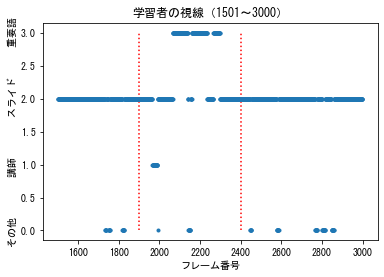

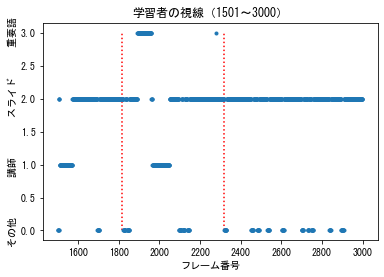

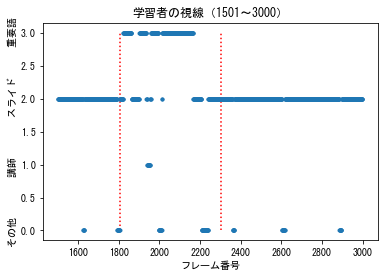

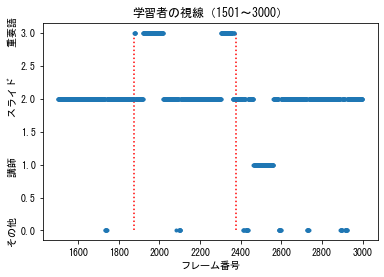

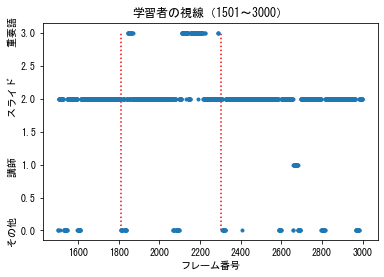

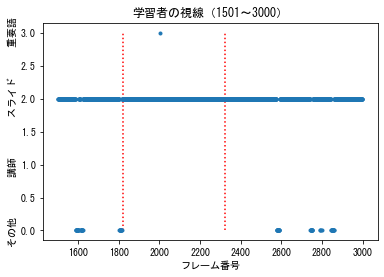

In [13]:
# 区間指定での可視化（区間はdfg基準）
# df3way[1].reset_index()["index"]
for i in range(len(df3way)):
    imlist = a_l[i]
    plt.plot(df3way[i].reset_index()["index"][1501:3000], df3way[i].reset_index()["l_or_s_or_b"][1501:3000], '.')
    for n in range(len(imlist)):
        if int(imlist[n][0])>=3000:
            continue
        plt.vlines(imlist[n][0], 0, 3, color='r', linestyles='dotted')
        plt.vlines(imlist[n][1], 0, 3, color='r', linestyles='dotted')
    plt.xlabel("視線フレーム番号")
    plt.ylabel("その他　　　　講師　　　　スライド　　　重要語")
    plt.title("学習者の視線（1501～3000）")
#     plt.savefig(f"../data/グラフ類/学習者の視線_{i}.jpg", bbox_inches="tight")
    plt.show()

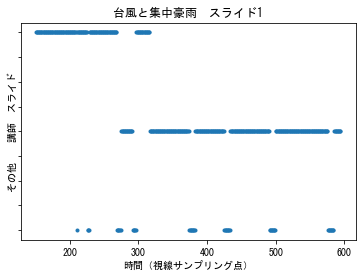

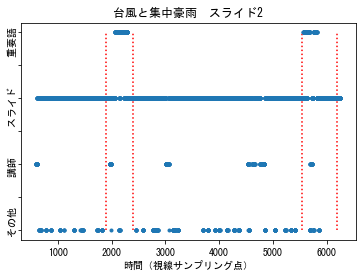

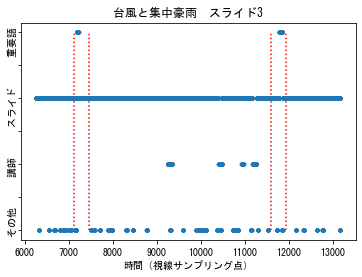

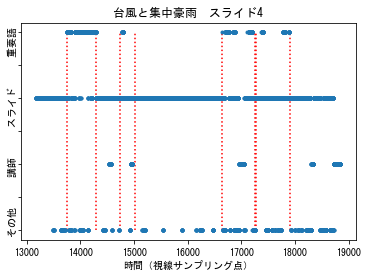

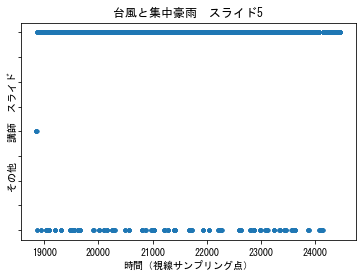

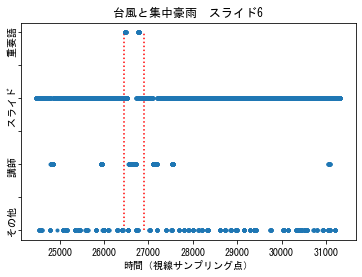

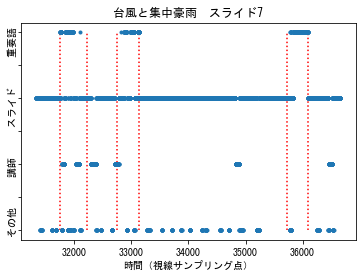

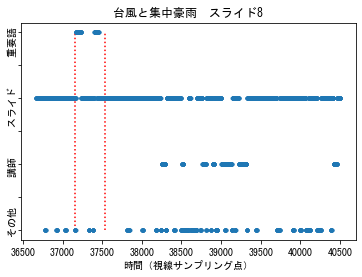

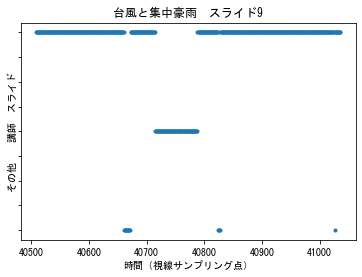

--------------------------------------------------- 
 ---------------------------------------------------


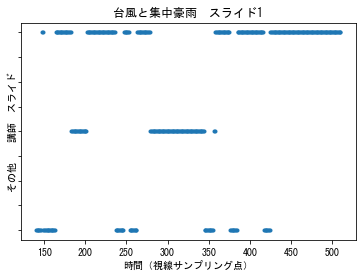

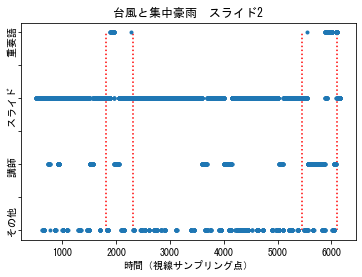

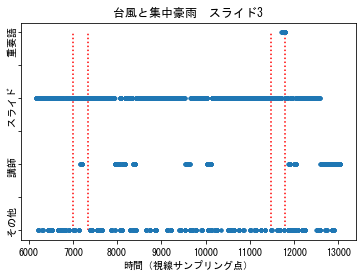

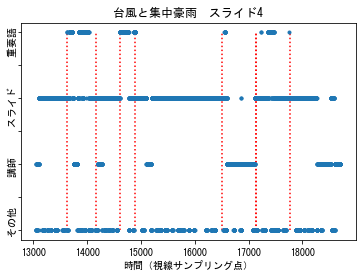

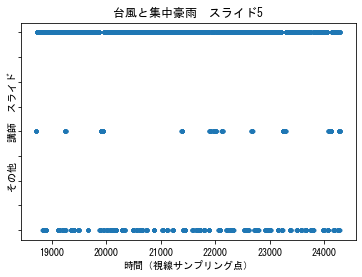

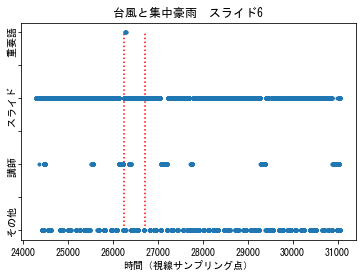

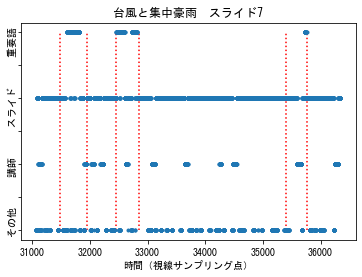

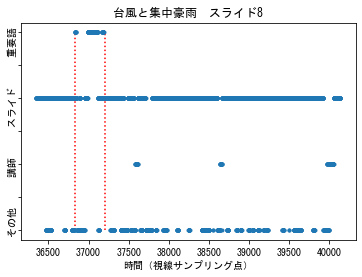

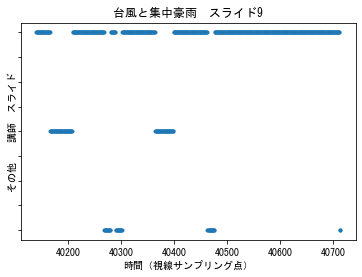

--------------------------------------------------- 
 ---------------------------------------------------


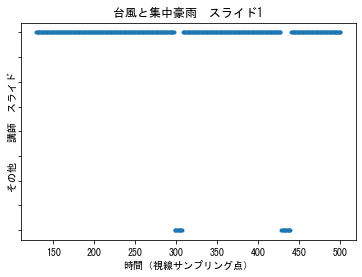

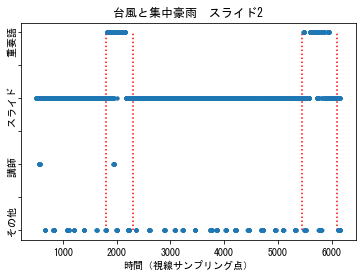

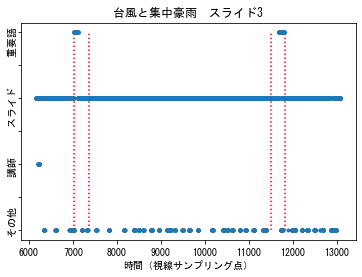

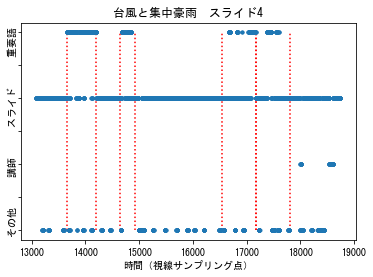

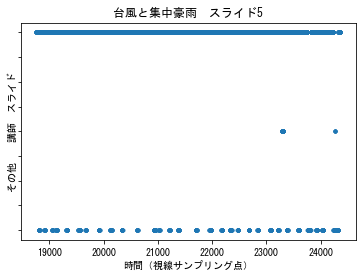

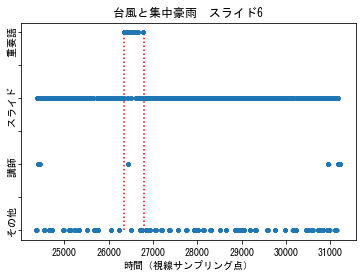

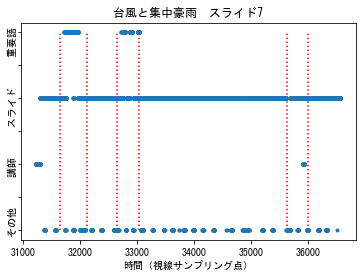

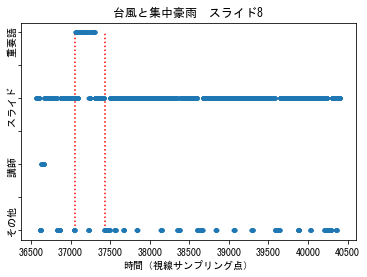

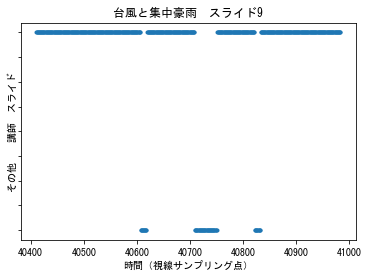

--------------------------------------------------- 
 ---------------------------------------------------


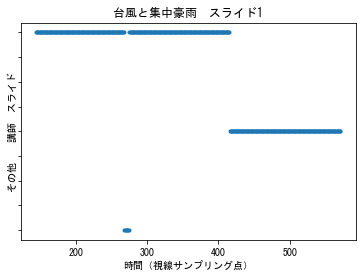

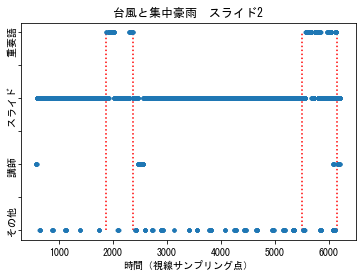

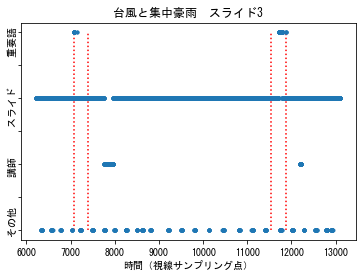

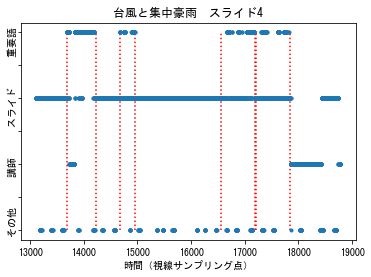

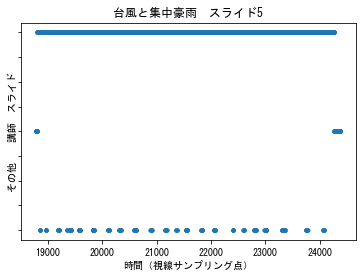

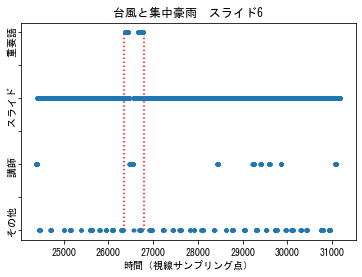

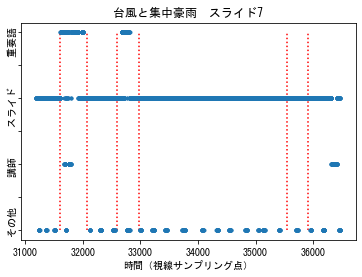

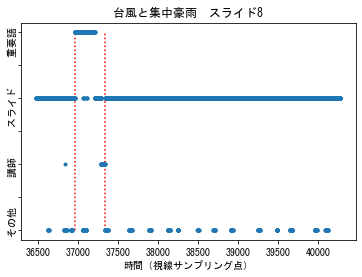

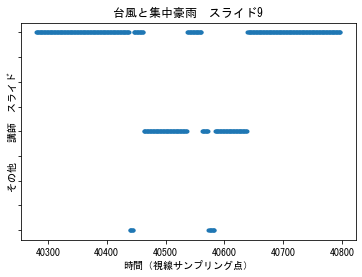

--------------------------------------------------- 
 ---------------------------------------------------


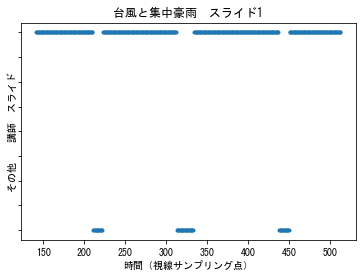

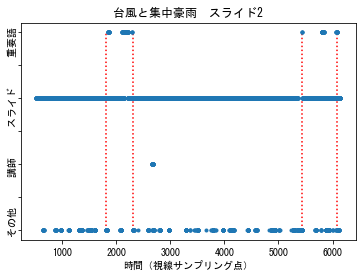

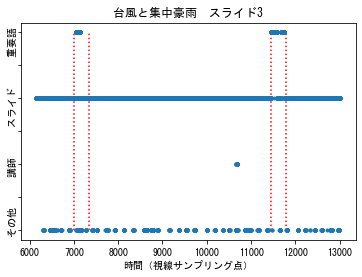

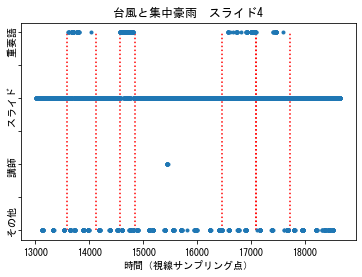

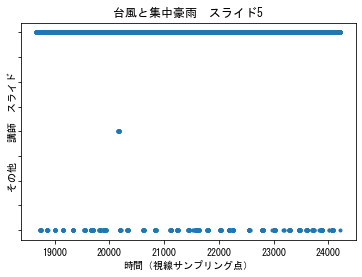

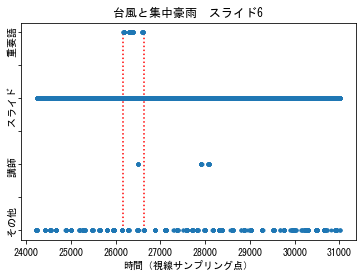

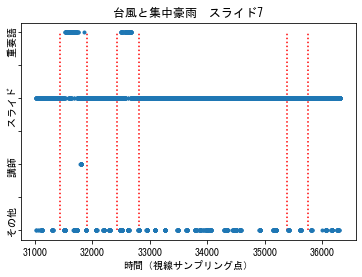

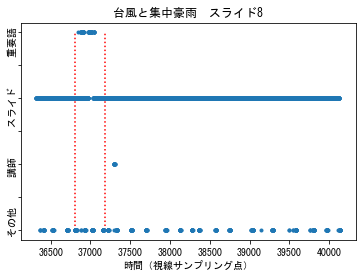

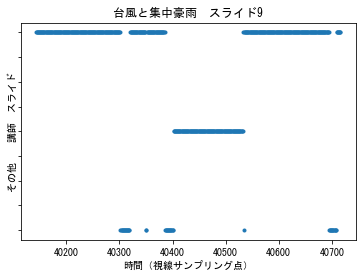

--------------------------------------------------- 
 ---------------------------------------------------


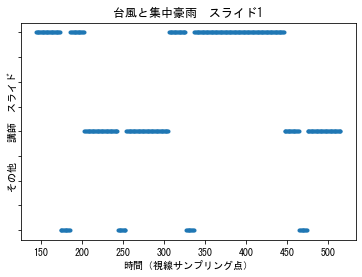

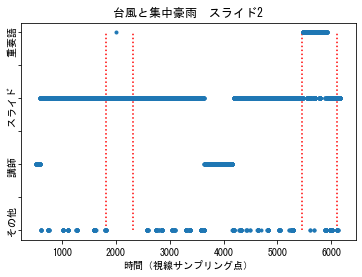

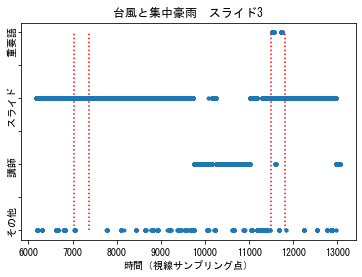

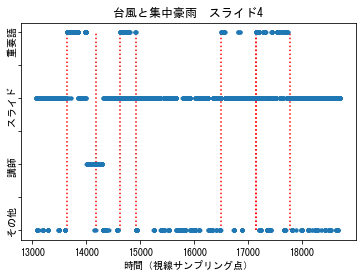

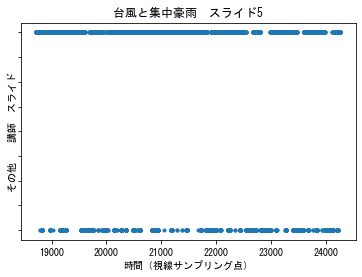

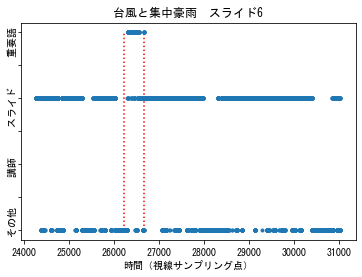

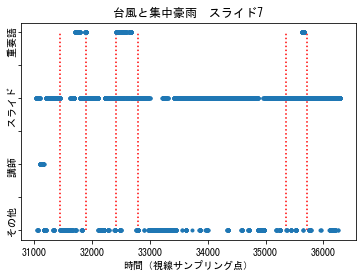

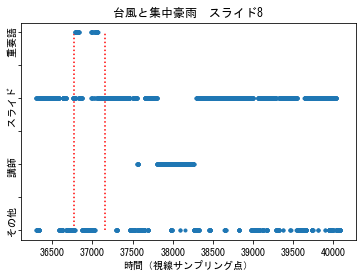

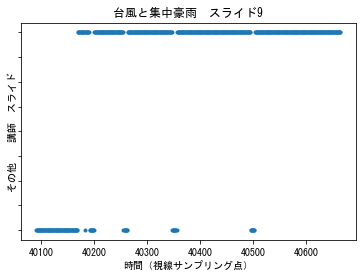

--------------------------------------------------- 
 ---------------------------------------------------


In [11]:
# スライド単位での可視化
# 視線判定（0：空白, 1：講師, 2：スライド, 3：重要語）スライド単位
# plt.rcParams["font.size"] = 5
for i in range(len(df3way)):
# for i in range(1):
    imlist = a_l[i]
    sn = 0
    n1 = 0
    n2 = 0
    for n in range(len(slide_list)):
#         print(n)
#         fig = plt.figure(figsize=(3, 0.5))
        plt.plot(df3way[i].reset_index()["index"][int(slide_l[i][n][0]):int(slide_l[i][n][1])], df3way[i].reset_index()["l_or_s_or_b"][int(slide_l[i][n][0]):int(slide_l[i][n][1])], '.')
        if sn != len(imlist):
            while df3way[i].reset_index()["index"][int(imlist[sn][0])]<=df3way[i].reset_index()["index"][int(slide_l[i][n][1])]:
#             df3way[i].reset_index()["index"][int(imlist[sn][0])]>=df3way[i].reset_index()["index"][int(slide_l[i][n][0])]
#             print(int(imlist[sn][0]))
                plt.vlines(int(imlist[sn][0]), 0, 3, color='r', linestyles='dotted')
                plt.vlines(int(imlist[sn][1]), 0, 3, color='r', linestyles='dotted')
                sn += 1
#                 print(sn)
#                 print(len(imlist))
                if sn==len(imlist):
                    break
#             elif int(imlist[sn][0])>=int(slide_l[i][n][0]):
#                 plt.vlines(imlist[sn][0], 0, 3, color='r', linestyles='dotted')
#                 sn += 1
#             elif int(imlist[sn][1])<=int(slide_l[i][n][1]):
#                 plt.vlines(imlist[sn][1], 0, 3, color='r', linestyles='dotted')
#                 sn += 1
        plt.xlabel("時間（視線サンプリング点）")
#         plt.ylim(-0.5, 3)
#        plt.xlim(df3way[i].reset_index()["index"][int(slide_l[i][n][1])], df3way[i].reset_index()["index"][int(slide_l[i][n][1])])
#         print(2 in df3way[i].reset_index()["l_or_s_or_b"][int(slide_l[i][n][0]):int(slide_l[i][n][1])])
        n1 = n2
        n2 = sn
        if n1!= n2:
#             plt.ylabel("other lec slide im", fontsize=5)
            plt.ylabel("その他　　　講師　　　スライド　　　重要語")
        else:
            plt.ylabel("その他　　講師　スライド")
        plt.tick_params(labelleft=False)
        plt.title(f"学習者の視線{int(slide_l[i][n][0])}～{int(slide_l[i][n][1])}")
#         plt.title(f"スライド{n+1}") # 学習者の視線はキャプション
        plt.title(f"台風と集中豪雨　スライド{n+1}")
#         plt.savefig(f"../data/グラフ類/group{gnum}-{videoid}_user{i}_slide{n+1}.jpg", bbox_inches="tight")
        plt.show()
    print("---------------------------------------------------", "\n", "---------------------------------------------------")

## 重要語を含まない

In [9]:
# 視線判定（0：空白, 1：講師, 2：スライド）
df3way = []
for n in range(len(eyefpath)):
    df3w = pd.DataFrame(columns={"l_or_s_or_b"})
    c = 0
    for i in range(len(dfg[n])):
#             講師
        if dfg[n]["eye_x"][i]>1036 and dfg[n]["eye_y"][i]>213 and dfg[n]["eye_y"][i]<500:
            df3w.loc[i] = 1
        # スライド
        elif dfg[n]["eye_x"][i]<1036 and dfg[n]["eye_y"][i]>80 and dfg[n]["eye_y"][i]<640:
            df3w.loc[i] = 2
#                 それ以外を見ていた
        else:
            df3w.loc[i] = 0
    df3way.append(df3w)
    print(n)

0
1
2
3
4
5


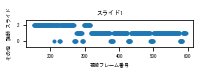

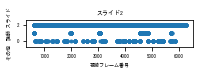

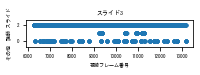

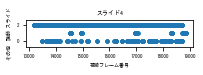

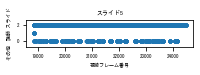

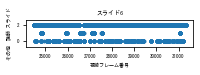

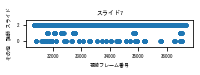

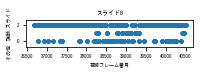

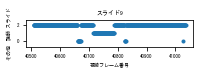

--------------------------------------------------- 
 ---------------------------------------------------


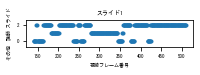

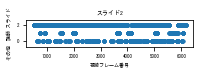

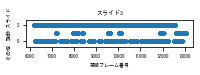

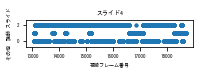

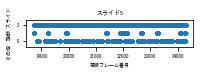

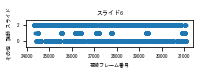

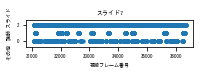

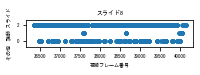

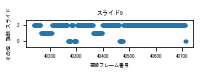

--------------------------------------------------- 
 ---------------------------------------------------


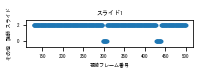

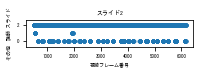

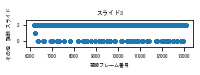

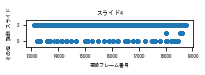

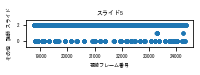

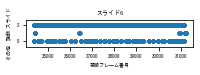

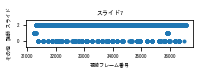

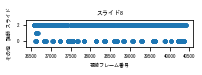

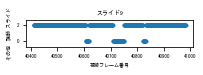

--------------------------------------------------- 
 ---------------------------------------------------


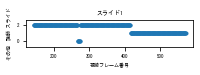

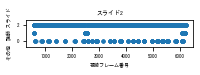

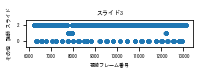

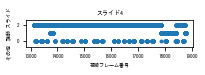

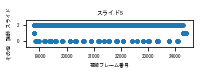

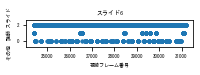

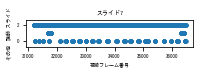

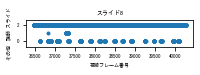

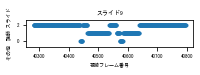

--------------------------------------------------- 
 ---------------------------------------------------


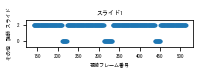

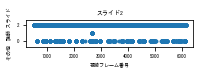

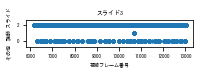

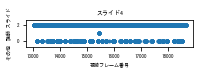

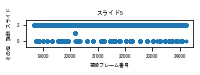

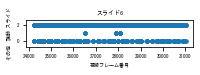

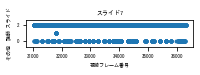

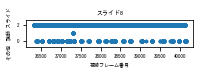

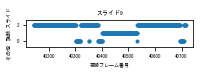

--------------------------------------------------- 
 ---------------------------------------------------


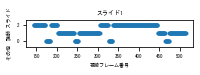

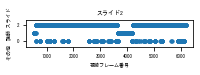

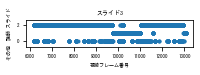

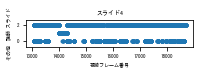

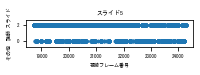

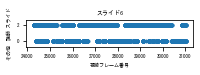

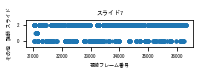

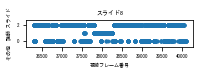

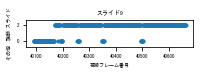

--------------------------------------------------- 
 ---------------------------------------------------


In [17]:
# 視線判定（0：空白, 1：講師, 2：スライド）スライド単位
plt.rcParams["font.size"] = 5
for i in range(len(df3way)):
# for i in range(1):
    imlist = a_l[i]
    sn = 0
    n1 = 0
    n2 = 0
    for n in range(len(slide_list)):
#         print(n)
        fig = plt.figure(figsize=(3, 0.5))
        plt.plot(df3way[i].reset_index()["index"][int(slide_l[i][n][0]):int(slide_l[i][n][1])], df3way[i].reset_index()["l_or_s_or_b"][int(slide_l[i][n][0]):int(slide_l[i][n][1])], '.')
        plt.xlabel("視線フレーム番号")
        plt.ylabel("その他　講師 スライド") # 教材
        plt.ylim(-0.7, 2.7)
        plt.title(f"学習者の視線{int(slide_l[i][n][0])}～{int(slide_l[i][n][1])}")
        plt.title(f"スライド{n+1}") # 学習者の視線はキャプション
        plt.savefig(f"../data/グラフ類/nonim_group{gnum}-{videoid}_user{i}_slide{n+1}.pdf", bbox_inches="tight")
        plt.show()
    print("---------------------------------------------------", "\n", "---------------------------------------------------")

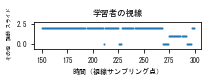

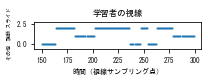

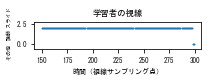

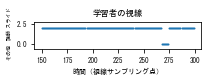

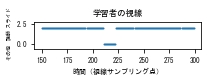

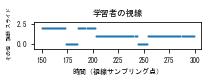

In [48]:
plt.rcParams["font.size"] = 7
for i in range(len(df3way)):
    imlist = a_l[i]
    fig = plt.figure(figsize=(3, 0.5))
    plt.plot(df3way[i].reset_index()["index"][150:300], df3way[i].reset_index()["l_or_s_or_b"][150:300], '.', markersize=2)
    plt.xlabel("時間（視線サンプリング点）")
    plt.ylabel("  その他　講師 スライド", fontsize=5)
    plt.ylim(-0.7, 2.7)
    plt.title("学習者の視線")
#     plt.savefig(f"../data/グラフ類/ipsj_nonim_group{gnum}-{videoid}_user{i}_slide{n+1}.png", bbox_inches="tight")
    plt.show()

In [49]:
tcsv = df3way[1].reset_index()["l_or_s_or_b"][150:300]
tcsv.to_csv("../data/test_csv.csv")

In [30]:
# 旧視点確認
# c = 0
# for l in alist:
#     c += 1
#     for i in range(len(eyefpath)):
#         dfm = pd.merge(dfg[i], dfv[i], on=["dt_sec","msec"])
#         dfm = dfm[dfm["counter"]>=l[0]]
#         dfm = dfm[dfm["counter"]<=l[1]]
#         dfm = dfm[dfm["eye_x"]>=l[2]]
#         dfm = dfm[dfm["eye_y"]>=l[3]]
#         dfm = dfm[dfm["eye_x"]<=l[4]]
#         dfm = dfm[dfm["eye_y"]<=l[5]]
#         if len(dfm) > 1:
#             print(c, "-", i+1, "個目", "\n", dfm.iloc[[0, len(dfm)-1]][["dt_sec", "msec"]])
#         elif len(dfm) == 1:
#             print(c, "-", i+1, "個目", "\n", dfm[["dt_sec", "msec"]])

In [32]:
# print(len(eyefpath))
# sys_clock確認
# for i in range(len(eyefpath)):
#     dfm = pd.merge(dfg[i], dfv[i], on=["sys_clock"])
#     print(len(dfm))


In [28]:
# dfv[1][563:731]
#dfgc[0]["sys_clock"][0]
# dfv[0]["sys_clock"][1778]

117011643684276

In [31]:
# 残骸
# c = 0
# for i in range(len(dfg)):
#     dfgc = dfg[i].copy()
#     for l in alist:
#         while dfv[i]["sys_clock"][l[0]]>=dfgc["sys_clock"][0]:
#             dfgc = dfgc[1:].reset_index(drop=True)
# #             c += 1
# #             print(c)
# #         print(dfgc.head(1))

#         if (dfv[i]["sys_clock"][l[0]]<=dfgc["sys_clock"][0]) & (dfv[i]["sys_clock"][l[1]]>=dfgc["sys_clock"][0]):
# #             print(l[1])
# #             print(dfgc.head())
#             dfgcc = dfgc[dfgc["eye_x"]>=l[2]]
#             dfgcc = dfgcc[dfgcc["eye_y"]>=l[3]]
#             dfgcc = dfgcc[dfgcc["eye_x"]<=l[4]]
#             dfgcc = dfgcc[dfgcc["eye_y"]<=l[5]]
#             print(i, l[0])
#             dfgc = dfgc[1:].reset_index(drop=True)



# 重要語グラフ
#         if dfg[(dfg[n]["sys_clock"][i]>=(dfv[n]["sys_clock"][alist[0]])) & (dfg[n]["sys_clock"][i]<=(dfv[n]["sys_clock"][alist[1]]))]: